In [1]:
from IPython.core.display import HTML

# Style headers
HTML('<style> \
   h1 { border: 1.5px solid #333; \
        padding: 25px 25px; \
        background-color: #82E0AA; \
        font-family: Sans-Serif; \
        text-align: center} \
   \
   h2 { border: 1.5px solid #333; \
        padding: 12px 12px; \
        background-color: #82E0AA; \
        font-family: Sans-Serif} \
   \
   h3 { border: 1.5px solid #333; \
        padding: 12px 12px; \
        background-color: #D5F5E3; \
        font-family: Sans-Serif} \
      </style>')

# Project: G2M insight for Cab Investment firm 

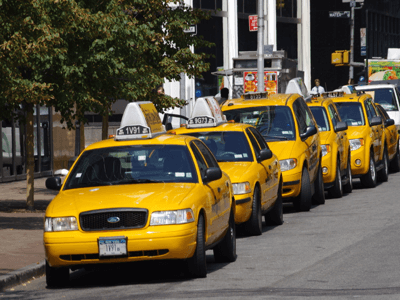

# Overview

- XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-1">Import modules</a></span></li><li><span><a href="#Configuration" data-toc-modified-id="Configuration-2">Configuration</a></span></li><li><span><a href="#Auxilary-functions" data-toc-modified-id="Auxilary-functions-3">Auxilary functions</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-4">Load data</a></span><ul class="toc-item"><li><span><a href="#Cab" data-toc-modified-id="Cab-4.1">Cab</a></span></li><li><span><a href="#City" data-toc-modified-id="City-4.2">City</a></span></li><li><span><a href="#Customer_id" data-toc-modified-id="Customer_id-4.3">Customer_id</a></span></li><li><span><a href="#Transaction_id" data-toc-modified-id="Transaction_id-4.4">Transaction_id</a></span></li><li><span><a href="#Holidays" data-toc-modified-id="Holidays-4.5">Holidays</a></span></li></ul></li><li><span><a href="#Concatenate-data" data-toc-modified-id="Concatenate-data-5">Concatenate data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-6">EDA</a></span><ul class="toc-item"><li><span><a href="#Common" data-toc-modified-id="Common-6.1">Common</a></span><ul class="toc-item"><li><span><a href="#Types" data-toc-modified-id="Types-6.1.1">Types</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-6.1.2">Missing values</a></span></li><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-6.1.3">Duplicates</a></span></li></ul></li><li><span><a href="#Numerical" data-toc-modified-id="Numerical-6.2">Numerical</a></span></li><li><span><a href="#Categorical" data-toc-modified-id="Categorical-6.3">Categorical</a></span><ul class="toc-item"><li><span><a href="#Cardinality" data-toc-modified-id="Cardinality-6.3.1">Cardinality</a></span></li></ul></li><li><span><a href="#Correlation-analysis" data-toc-modified-id="Correlation-analysis-6.4">Correlation analysis</a></span><ul class="toc-item"><li><span><a href="#Correlogram" data-toc-modified-id="Correlogram-6.4.1">Correlogram</a></span></li></ul></li><li><span><a href="#Profit-analysis" data-toc-modified-id="Profit-analysis-6.5">Profit analysis</a></span></li><li><span><a href="#Segmentation-Analysis" data-toc-modified-id="Segmentation-Analysis-6.6">Segmentation Analysis</a></span></li><li><span><a href="#Seasonal-Analysis" data-toc-modified-id="Seasonal-Analysis-6.7">Seasonal Analysis</a></span></li><li><span><a href="#Coverage-Analysis" data-toc-modified-id="Coverage-Analysis-6.8">Coverage Analysis</a></span></li><li><span><a href="#Retention-Analysis" data-toc-modified-id="Retention-Analysis-6.9">Retention Analysis</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7">Conclusion</a></span></li></ul></div>

# Data Description

Data contains information on 2 cab companies. 

Each file (data set) provided represents different aspects of the customer profile.

 - **Cab_Data.csv** – this file includes details of transaction for 2 cab companies


- **Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details


- **Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode


- **City.csv** – this file contains list of US cities, their population and number of cab users


- **Holiday.csv** – this file contains dates of US holidays

## Import modules

In [2]:
import pandas as pd

import numpy as np 
import math
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.ticker as ticker


## Configuration

In [3]:
cab = '../data/Cab_Data.csv'
city = '../data/City.csv'
customer_id = '../data/Customer_ID.csv'
transaction_id = '../data/Transaction_ID.csv'
holidays = '../data/US_Holiday_Dates.csv'

plt.style.use(style='seaborn')
warnings.filterwarnings("ignore")

## Auxilary functions

In [4]:
def corr_matrix(data):

    plt.figure(figsize=(12,10), dpi= 80)

    sns.heatmap(data.corr(), 
                xticklabels=data.columns, 
                yticklabels=data.columns, 
                cmap='RdBu_r', 
                center=0, 
                vmin=-1, vmax=1,
                annot=True)

    plt.title('Correlogram', fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    

In [5]:
def is_weekend(row):
    if row == 5 or row == 6:
        return 1
    else:
        return 0

In [6]:
def is_profitable(row):
    if row > 0:
        return 1
    else:
        return 0

## Load data

### Cab

In [7]:
df_cab = pd.read_csv(cab)

df_cab.info()
display(df_cab.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10433076,12/31/18,Pink Cab,ATLANTA GA,17.82,238.62,190.674
1,10433087,12/31/18,Pink Cab,AUSTIN TX,35.52,502.96,369.408
2,10433097,12/31/18,Pink Cab,AUSTIN TX,28.50,411.40,336.300
3,10433128,12/31/18,Pink Cab,BOSTON MA,29.97,390.42,317.682
4,10433131,12/31/18,Pink Cab,BOSTON MA,27.27,370.20,324.513


### City

In [8]:
df_city = pd.read_csv(city)

df_city.info()
display(df_city.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


### Customer_id

In [9]:
df_customer_id = pd.read_csv(customer_id)

df_customer_id.info()
display(df_customer_id.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


### Transaction_id

In [10]:
df_transaction_id = pd.read_csv(transaction_id)

df_transaction_id.info()
display(df_transaction_id.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


### Holidays

In [11]:
df_holidays = pd.read_csv(holidays)

df_holidays.info()
display(df_holidays.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB


,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


## Concatenate data

In [12]:
df_total = df_cab.merge(df_transaction_id, left_on='Transaction ID', right_on='Transaction ID')

In [13]:
df_total = df_total.merge(df_customer_id, left_on='Customer ID', right_on='Customer ID')

In [14]:
df_total = df_total.merge(df_city, left_on='City', right_on='City')

In [15]:
df_total['Date of Travel'] = pd.to_datetime(df_total['Date of Travel'], format='%m/%d/%y')

df_total = df_total.rename(columns={"Date of Travel": "Date"})

df_holidays['Date'] = pd.to_datetime(df_holidays['Date'], format='%Y-%m-%d')

In [16]:
df_total = df_total.merge(df_holidays, how='left')

In [17]:
df_total['Holiday'] = df_total['Holiday'].fillna(0)
df_total.loc[df_total.Holiday != 0, 'Holiday'] = 1

In [18]:
df_total['WeekDay'] = df_total['Date'].dt.dayofweek
df_total['Month'] = df_total['Date'].dt.month
df_total['Day'] = df_total['Date'].dt.day
df_total['Year'] = df_total['Date'].dt.year
df_total['Day_Name'] = df_total['Date'].dt.day_name()
df_total['Quarter'] = df_total['Date'].dt.quarter
df_total['Weekend'] = df_total['WeekDay'].apply(is_weekend)


In [19]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359854 entries, 0 to 359853
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359854 non-null  int64         
 1   Date                359854 non-null  datetime64[ns]
 2   Company             359854 non-null  object        
 3   City                359854 non-null  object        
 4   KM Travelled        359854 non-null  float64       
 5   Price Charged       359854 non-null  float64       
 6   Cost of Trip        359854 non-null  float64       
 7   Customer ID         359854 non-null  int64         
 8   Payment_Mode        359854 non-null  object        
 9   Gender              359854 non-null  object        
 10  Age                 359854 non-null  int64         
 11  Income (USD/Month)  359854 non-null  int64         
 12  Population          359854 non-null  object        
 13  Users               359854 no

## EDA

### Common

#### Types

In [20]:
df_total.dtypes

Transaction ID                 int64
Date                  datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                    object
Users                         object
Holiday                       object
WeekDay                        int64
Month                          int64
Day                            int64
Year                           int64
Day_Name                      object
Quarter                        int64
Weekend                        int64
dtype: object

- `Population` and `Users` should be changed to numeric

In [21]:
df_total["Population"]=df_total["Population"].str.replace(',','')
df_total["Users"]=df_total["Users"].str.replace(',','')

In [22]:
df_total['Population'] = df_total['Population'].astype('int64')
df_total['Users'] = df_total['Users'].astype('int64')

In [23]:
df_total.dtypes

Transaction ID                 int64
Date                  datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                     int64
Users                          int64
Holiday                       object
WeekDay                        int64
Month                          int64
Day                            int64
Year                           int64
Day_Name                      object
Quarter                        int64
Weekend                        int64
dtype: object

#### Missing values

In [24]:
df_total.isna().sum()

Transaction ID        0
Date                  0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Holiday               0
WeekDay               0
Month                 0
Day                   0
Year                  0
Day_Name              0
Quarter               0
Weekend               0
dtype: int64

- No data is missing

#### Duplicates

In [25]:
print('Percent of duplicates: {:.2%}'.format(df_total.duplicated().sum()/len(df_total)))

Percent of duplicates: 0.13%


- Amount of duplicates is extremely low, so we can drop them

In [26]:
df_total = df_total.drop_duplicates()

### Numerical

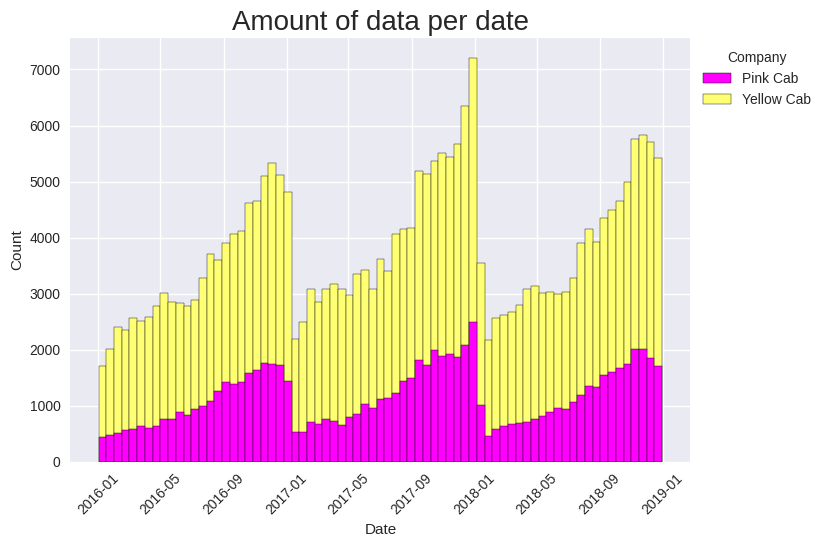

,min,max
Company,,
Pink Cab,2016-01-02,2018-12-31
Yellow Cab,2016-01-02,2018-12-31


In [27]:
ax = sns.histplot(data=df_total, x='Date', hue='Company', 
                  alpha=1, palette=['#FF00FF', '#FFFF74'])

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.title('Amount of data per date', fontsize=20)
plt.xticks(rotation=45)
plt.show()

display(df_total.groupby('Company')['Date'].agg(['min', 'max']))

- Data is represented in period from `2016-01-02` to `2018-12-31` for each company

Text(0.5, 1.0, 'KM Travelled')

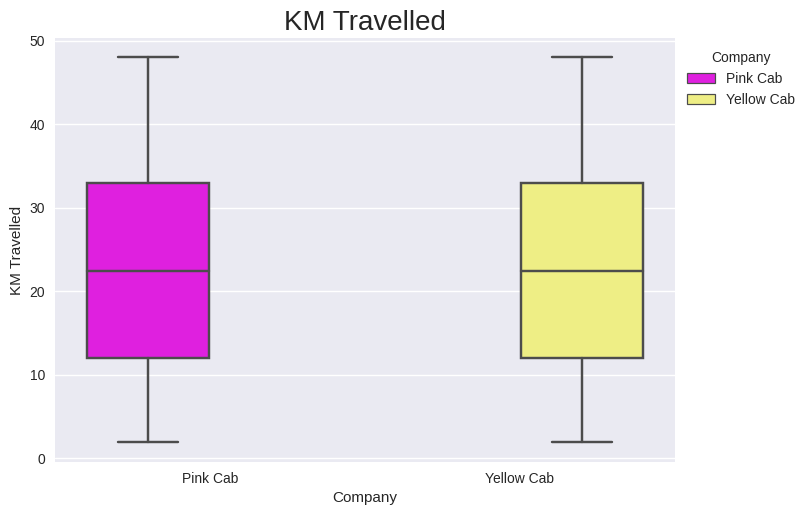

In [28]:
ax = sns.boxplot(data=df_total, y='KM Travelled', x='Company', hue='Company', palette=['#FF00FF', '#FFFF74'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('KM Travelled', fontsize=20)


- Distributions of `KM Travelled` is almost equal for both companies

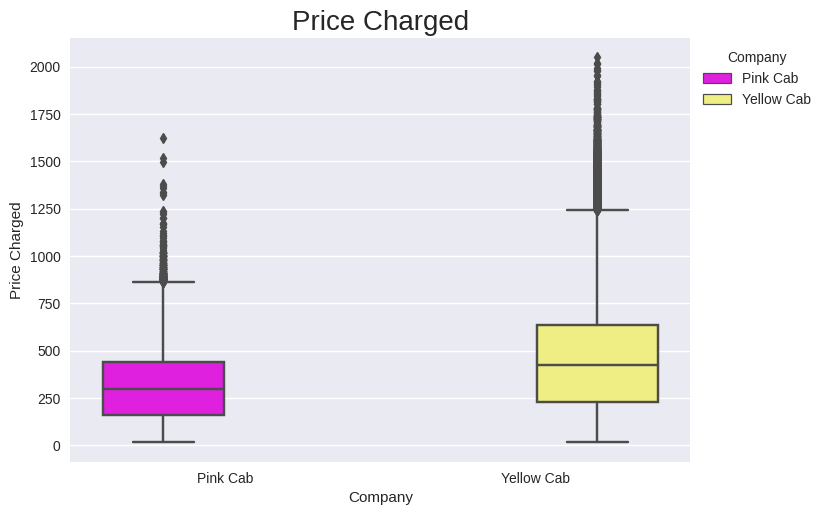

,min,max,mean,std
Company,,,,
Pink Cab,15.6,1623.5,310.8,182.0
Yellow Cab,20.7,2048.0,458.2,288.4


In [29]:
ax = sns.boxplot(data=df_total, y='Price Charged', x='Company', hue='Company', palette=['#FF00FF', '#FFFF74'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Price Charged', fontsize=20)
plt.show()

display(df_total.groupby('Company')['Price Charged'].agg(['min', 'max', 'mean', 'std']).round(1))

- In terms of `Price Charged` - `Yellow` company have charged more in general 


- There are some outliers in high range of values

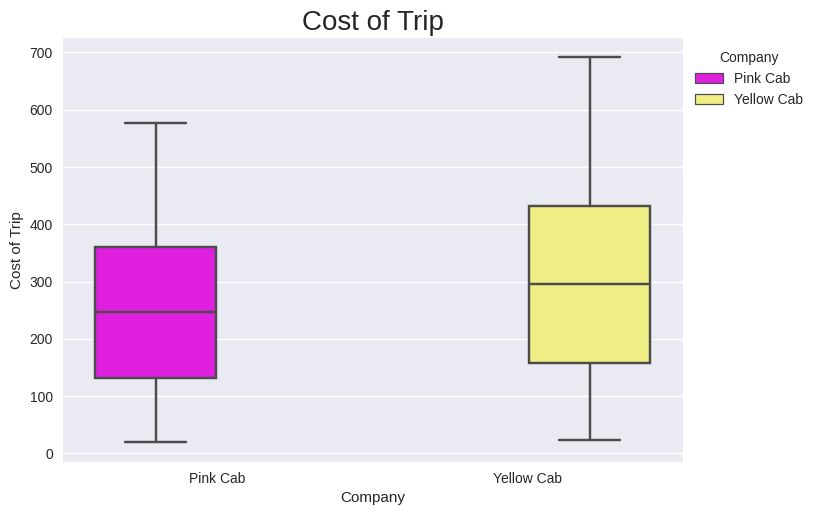

,min,max,mean,std
Company,,,,
Pink Cab,19.0,576.0,248.1,135.4
Yellow Cab,22.8,691.2,297.9,162.5


In [30]:
ax = sns.boxplot(data=df_total, y='Cost of Trip', x='Company', hue='Company', palette=['#FF00FF', '#FFFF74'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Cost of Trip', fontsize=20)
plt.show()
display(df_total.groupby('Company')['Cost of Trip'].agg(['min', 'max', 'mean', 'std']).round(1))

- `Cost of Trip` is higher in general for `Yellow` company

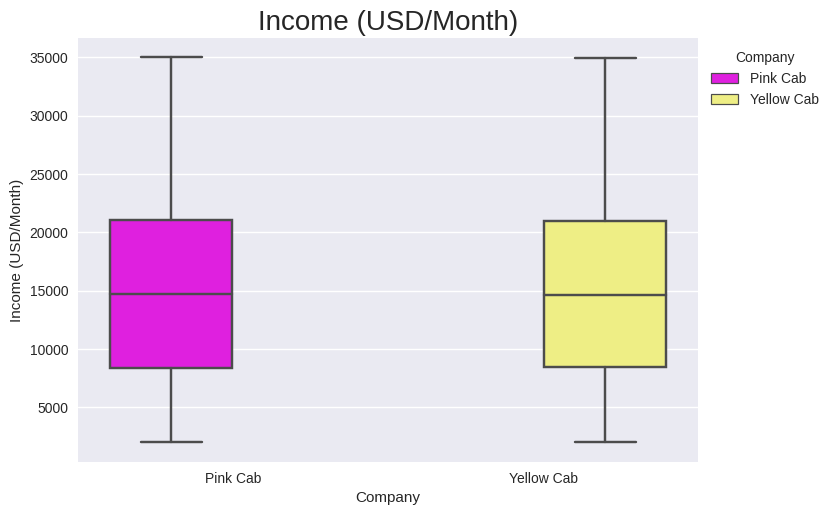

,min,max,mean,std
Company,,,,
Pink Cab,2000,35000,15059.0,7991.1
Yellow Cab,2000,34996,15045.7,7962.7


In [31]:
ax = sns.boxplot(data=df_total, y='Income (USD/Month)', x='Company', hue='Company', palette=['#FF00FF', '#FFFF74'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Income (USD/Month)', fontsize=20)
plt.show()
display(df_total.groupby('Company')['Income (USD/Month)'].agg(['min', 'max', 'mean', 'std']).round(1))

- People with similar `Income` are using both companies equally

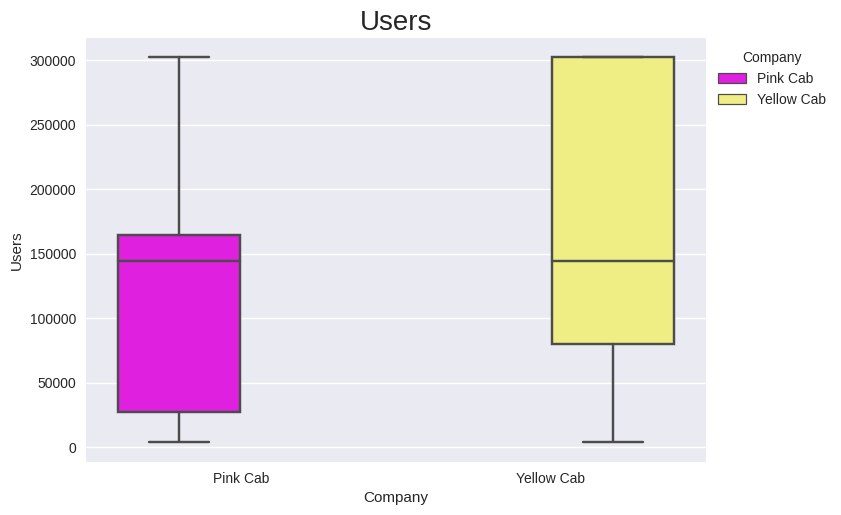

,min,max,mean,std
Company,,,,
Pink Cab,3643,302149,125590.8,94593.4
Yellow Cab,3643,302149,168473.2,100570.6


In [32]:
ax = sns.boxplot(data=df_total, y='Users', x='Company', hue='Company', palette=['#FF00FF', '#FFFF74'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Users', fontsize=20)
plt.show()
display(df_total.groupby('Company')['Users'].agg(['min', 'max', 'mean', 'std']).round(1))

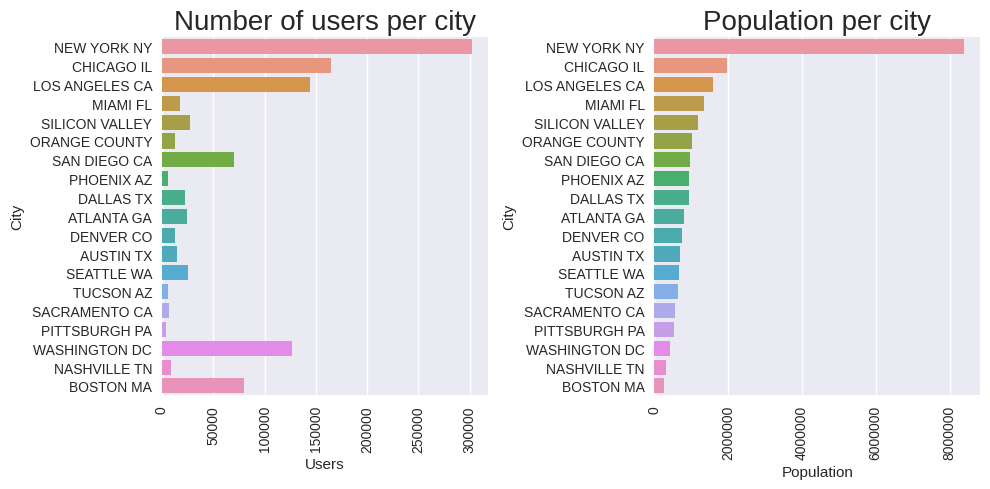

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(data=df_total.sort_values(by='Population', ascending=False), 
            x='Users', y='City', ax=ax[0])
sns.barplot(data=df_total.sort_values(by='Population', ascending=False), 
            x='Population', y='City', ax=ax[1])

ax[0].tick_params(axis='x', labelrotation=90)
ax[1].tick_params(axis='x', labelrotation=90)

ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))

ax[0].set_title('Number of users per city', fontsize=20)
ax[1].set_title('Population per city', fontsize=20)

plt.tight_layout()
plt.show()

- Number of `Users` in the city doesn't depend on population, perhaps it depends more on the size of the city

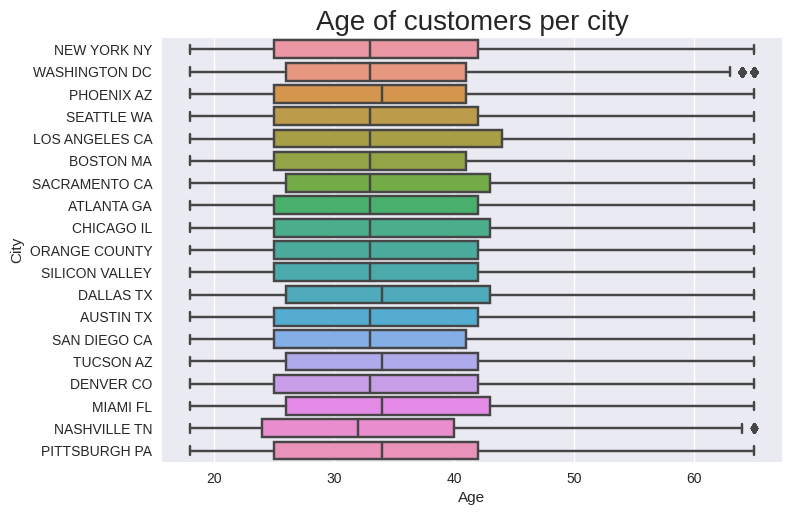

,min,max,mean,std
City,,,,
ATLANTA GA,18,65,35.3,12.9
AUSTIN TX,18,65,35.3,12.7
BOSTON MA,18,65,35.2,12.4
CHICAGO IL,18,65,35.7,13.0
DALLAS TX,18,65,35.7,12.7
DENVER CO,18,65,35.1,12.5
LOS ANGELES CA,18,65,35.7,12.8
MIAMI FL,18,65,35.9,12.5
NASHVILLE TN,18,65,34.3,12.4


In [34]:
sns.boxplot(data=df_total.sort_values(by='Age', ascending=False), x='Age', y='City')
plt.title('Age of customers per city', fontsize=20)
plt.show()
display(df_total.groupby('City')['Age'].agg(['min', 'max', 'mean', 'std']).round(1))

- In all `Cities` people have similar distribution of `Age` between 18 and 65 with mean value ~35 years 

### Categorical

#### Cardinality

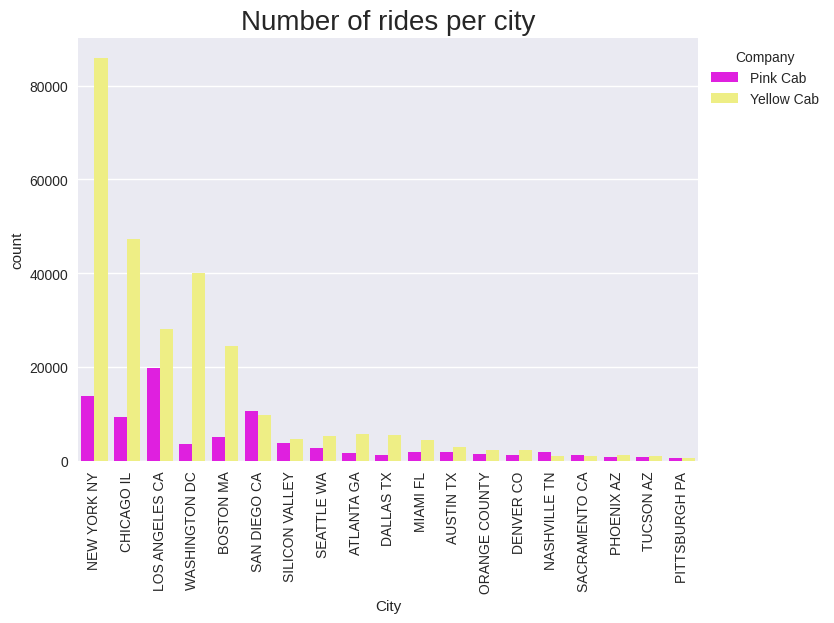

In [35]:
ax = sns.countplot(data=df_total, 
              x='City', hue='Company', 
              palette=['#FF00FF', '#FFFF74'], 
              order=df_total['City'].value_counts().index)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.title('Number of rides per city', fontsize=20)
plt.xticks(rotation=90)
plt.show()

- `Yellow` company has the most amount of rides in `New York`, `Pink` company - in `Los Angeles`

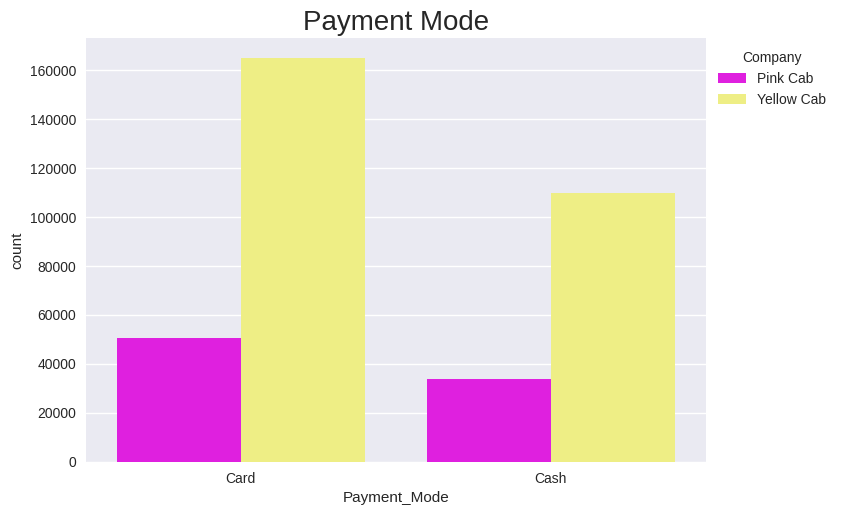

In [36]:
ax = sns.countplot(data=df_total, 
              x='Payment_Mode', hue='Company', 
              palette=['#FF00FF', '#FFFF74'], 
              order=df_total['Payment_Mode'].value_counts().index)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Payment Mode', fontsize=20)
plt.show()

- For both companies payment by `card` is more popular

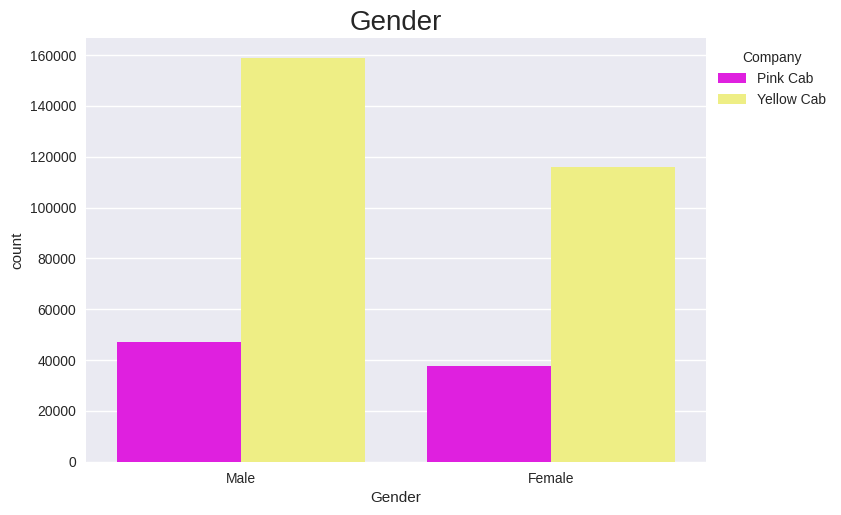

In [37]:
ax = sns.countplot(data=df_total, 
              x='Gender', hue='Company', 
              palette=['#FF00FF', '#FFFF74'], 
              order=df_total['Gender'].value_counts().index)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Gender', fontsize=20)
plt.show()

- Most clients for both companies payment are `Males`

### Correlation analysis

#### Correlogram

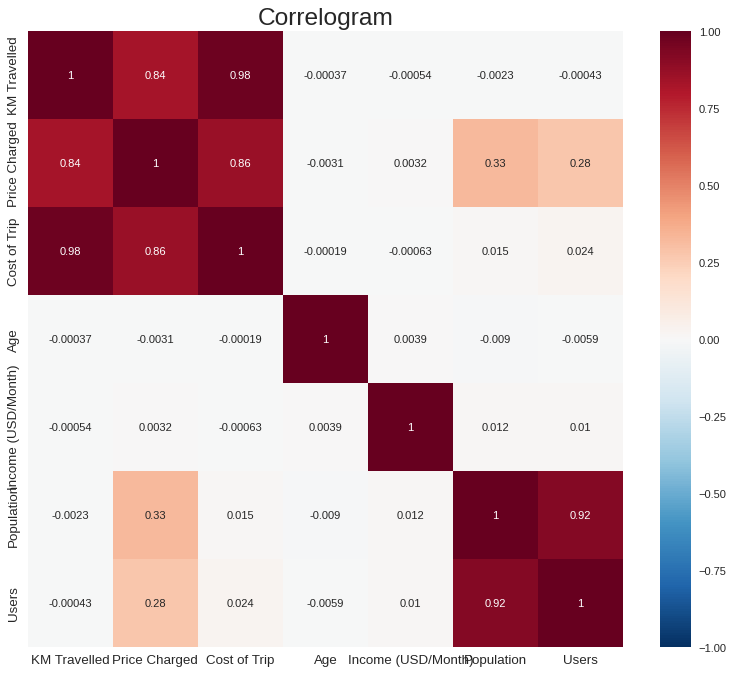

In [38]:
columns = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users']

corr_matrix(df_total[columns])

- Besides obvious correlation between `Price charged` - `Cost of trip` - `KM Travelled` and `Population` - `Users`, we can see weak correlation between `Price Charged` and `Population` and `Users`. That means in cities with large population tariffs for ride are higher

### Profit analysis

In [39]:
df_total['Profit'] = df_total['Price Charged'] - df_total['Cost of Trip']

df_total['Profit, %'] = df_total['Profit'] / df_total['Cost of Trip'] * 100

df_total['Is profitable'] = df_total['Profit'].apply(is_profitable) 

df_total['Profit per km'] = df_total['Profit'] / df_total['KM Travelled']

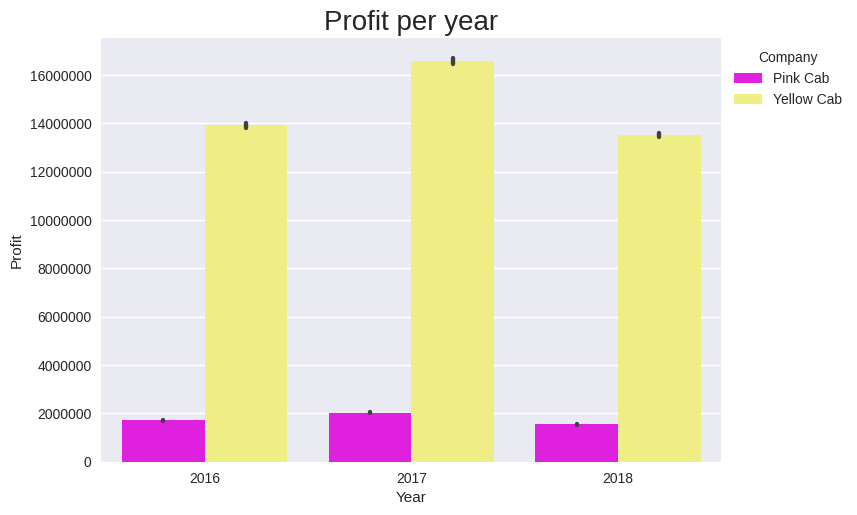

Profit             Profit Proportion
Company   Pink Cab  Yellow Cab                  
Year                                            
2016     1713511.2  13926995.4               8.1
2017     2033654.9  16575978.0               8.2
2018     1560162.2  13517399.8               8.7

In [40]:
ax = sns.barplot(data=df_total, x='Year', y='Profit', hue='Company', estimator=np.sum, palette=['#FF00FF', '#FFFF74'])

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))

plt.title('Profit per year', fontsize=20)
plt.show()

profit_per_year = df_total.groupby(['Year', 'Company']).agg({'Profit':'sum'}).round(1).unstack(1)
profit_per_year['Profit Proportion'] = profit_per_year[('Profit', 'Yellow Cab')] / profit_per_year[('Profit', 'Pink Cab')]
profit_per_year.round(1)

- Profit of `Yellow` company is ~8 times bigger than profit of `Pink` company

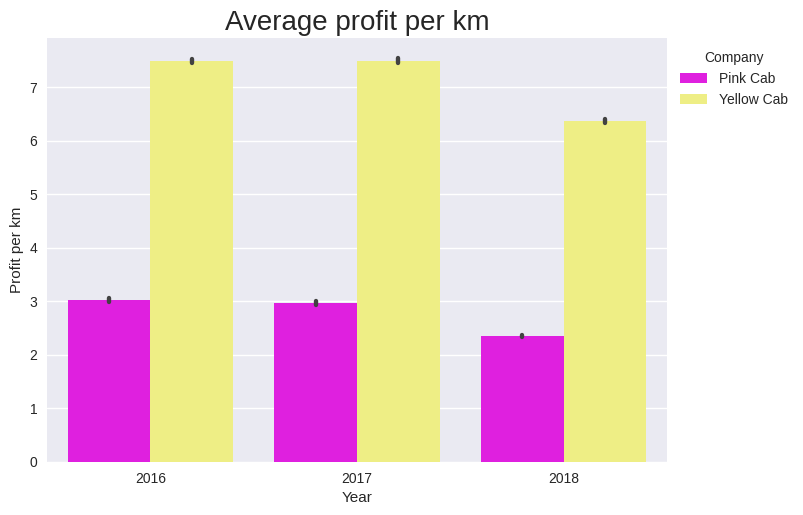

Profit per km            Profit per km Proportion
Company      Pink Cab Yellow Cab                         
Year                                                     
2016              3.0        7.5                      2.5
2017              3.0        7.5                      2.5
2018              2.4        6.4                      2.7

In [41]:
ax = sns.barplot(data=df_total, x='Year', y='Profit per km', hue='Company', estimator=np.mean, palette=['#FF00FF', '#FFFF74'])

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))

plt.title('Average profit per km', fontsize=20)
plt.show()


profit_per_km = df_total.groupby(['Year', 'Company']).agg({'Profit per km':'mean'}).round(1).unstack(1)
profit_per_km['Profit per km Proportion'] = profit_per_km[('Profit per km', 'Yellow Cab')] / profit_per_km[('Profit per km', 'Pink Cab')]
profit_per_km.round(1)

- Average profit per km of `Yellow` company is ~2.5 times bigger than of `Pink` company

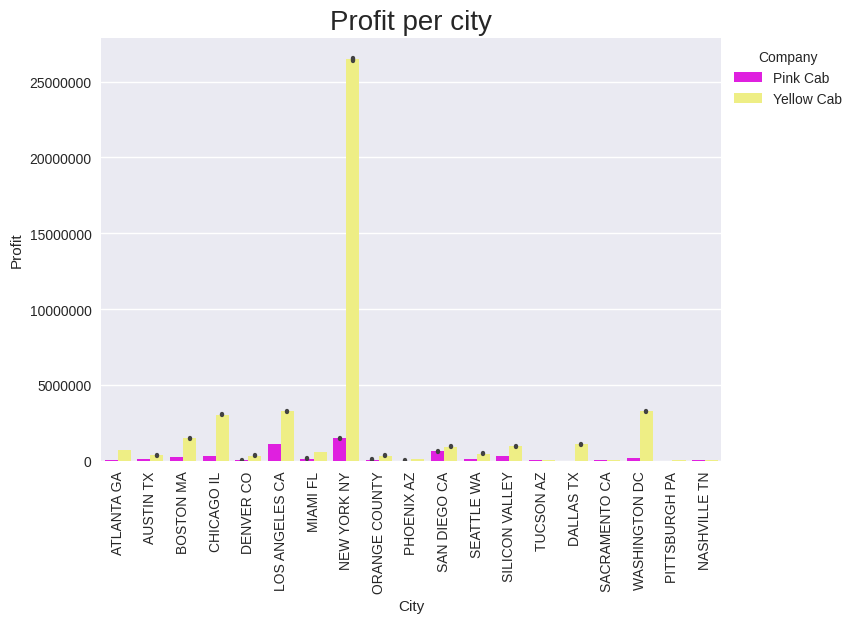

In [42]:
ax = sns.barplot(data=df_total, x='City', y='Profit', hue='Company', 
                 estimator=np.sum, palette=['#FF00FF', '#FFFF74'])

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))

plt.title('Profit per city', fontsize=20)
plt.xticks(rotation=90)
plt.show()


- Most of the profit of `Yellow` and `Pink` companies comes from `New York` 

In [43]:
profit = df_total.groupby('Company').agg({'Profit':'sum', 'Transaction ID':'nunique', 'Is profitable':'sum'})

profit['Percent of profitable rides'] = profit['Is profitable']/ profit['Transaction ID']*100

profit = profit.rename(columns={'Transaction ID':'Number of rides'})

profit[['Profit', 'Number of rides', 'Percent of profitable rides']].round(1)

,Profit,Number of rides,Percent of profitable rides
Company,,,
Pink Cab,5307328.3,84711,86.9
Yellow Cab,44020373.2,274681,95.0


- `Yellow` cab company has higher profit and 95% of rides are profitable

<div class="alert alert-block alert-info" style="background-color:#FEF9E7;color:black;border-color:black;width:90%;margin: auto;text-align: left;">
<b>Conclusion:</b> 
<br>
<br>1. Profit of Yellow company is ~8 times bigger than profit of Pink company
<br> 2. Average profit per km of Yellow company is ~2.5 times bigger than of Pink company
<br>3. Most of the profit of Yellow and Pink companies comes from New York
<br>4. Yellow cab company has higher profit and 95% of rides are profitable, in contrast 87% of Pink company's  rides are profitable</div>

### Segmentation Analysis

In [44]:
users = df_total.groupby(['Company', 'Customer ID']).agg({'Gender':'max', 'Age':'max', 'Income (USD/Month)':'max'}).reset_index()

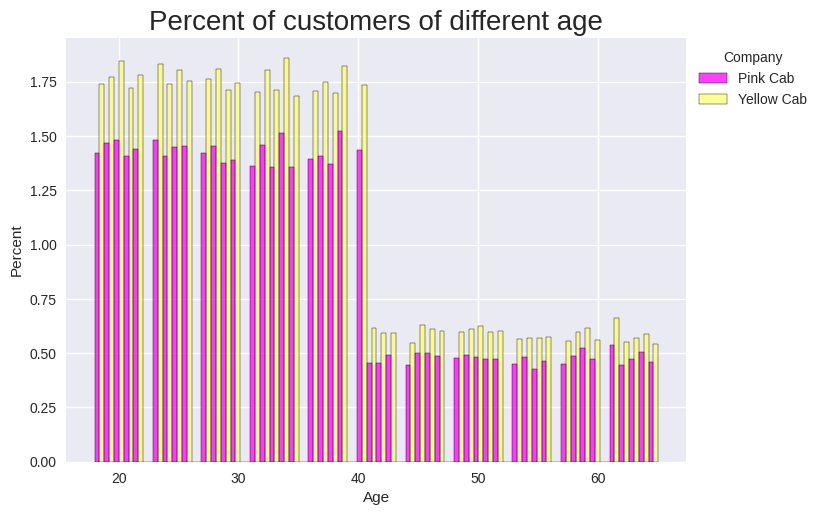

,"below age 40, %","above age 40, %"
Company,,
Pink Cab,73.4,26.6
Yellow Cab,73.3,26.7


In [45]:
ax = sns.histplot(data=users, x='Age', multiple='dodge', stat='percent',
                  hue='Company', palette=['#FF00FF', '#FFFF74'], )

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Percent of customers of different age', fontsize=20)
plt.show()

users_age = users[users.Age <= 40].groupby('Company')['Age'].count().reset_index()
users_age = users_age.rename(columns={'Age':'below age 40'})
users_age['above age 40'] = users[users.Age > 40].groupby('Company')['Age'].count().reset_index(drop=True)

users_age['total'] = users_age['below age 40'] + users_age['above age 40']

users_age['below age 40, %'] = users_age['below age 40']/users_age['total']*100
users_age['above age 40, %'] = users_age['above age 40']/users_age['total']*100

users_age[['Company', 'below age 40, %', 'above age 40, %']].set_index('Company').round(1)

- There is significant drop in percent customers `above age 40` for both companies

- `73%` of customers are `below age 40` and `27%` are older for both companies

In [46]:
gender = users.groupby(['Company', 'Gender'])['Gender'].count().unstack().reset_index()
gender['total'] = gender['Female'] + gender['Male']
gender['Female, %'] = gender['Female']/gender['total']*100
gender['Male, %'] = gender['Male']/gender['total']*100
gender = gender.set_index('Company')
gender['Percent Diff'] = gender['Male, %'] - gender['Female, %']
gender[['Female, %', 'Male, %', 'Percent Diff']].round(1)

Gender,"Female, %","Male, %",Percent Diff
Company,,,
Pink Cab,45.8,54.2,8.3
Yellow Cab,46.1,53.9,7.8


- In both companies percentage of `Males` is `~8% higher` than `Females`

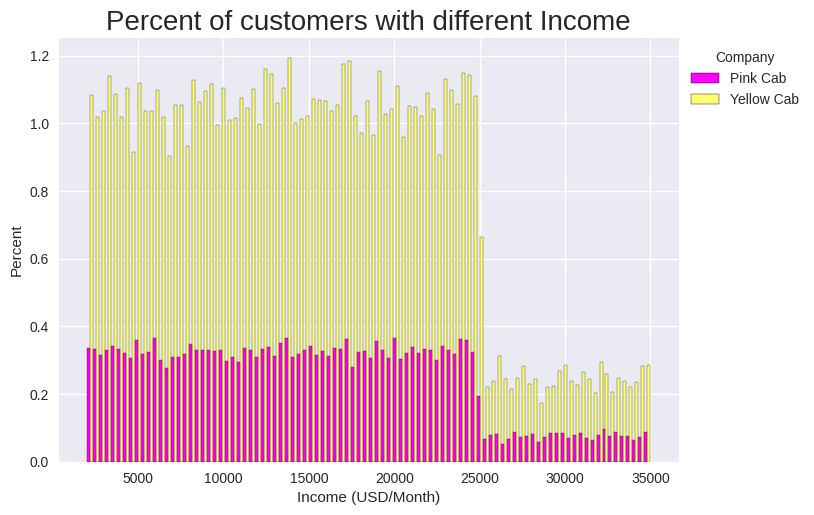

,"income below 25000, %","income above 25000, %"
Company,,
Pink Cab,90.8,9.2
Yellow Cab,90.9,9.1


In [47]:
ax = sns.histplot(data=df_total, x='Income (USD/Month)', hue='Company', 
             palette=['#FF00FF', '#FFFF74'], multiple='dodge', stat='percent', alpha=1)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Percent of customers with different Income', fontsize=20)
plt.show()

users_income = users[users['Income (USD/Month)'] <= 25000].groupby('Company')['Income (USD/Month)'].count().reset_index()
users_income = users_income.rename(columns={'Income (USD/Month)':'income below 25000'})
users_income['income above 25000'] = users[users['Income (USD/Month)'] > 25000].groupby('Company')['Income (USD/Month)'].count().reset_index(drop=True)

users_income['total'] = users_income['income below 25000'] + users_income['income above 25000']

users_income['income below 25000, %'] = users_income['income below 25000']/users_income['total']*100
users_income['income above 25000, %'] = users_income['income above 25000']/users_income['total']*100

users_income[['Company', 'income below 25000, %', 'income above 25000, %']].set_index('Company').round(1)

- There is significant decrease in percentage of users with income > 25000$

- `91%` of customers have income < 25000$ and `9%` have more

<div class="alert alert-block alert-info" style="background-color:#FEF9E7;color:black;border-color:black;width:90%;margin: auto;text-align: left;">
<b>Conclusion:</b> 
<br>    
<br>1. There is significant drop in percent customers above age 40 for both companies. 73% of customers are below age 40 and 27% are older for both companies
<br>2. In both companies percentage of Males is ~8% higher than Females
<br>3. - There is significant decrease in percentage of users with income > 25000 usd. 91% of customers have income < 25000 usd and 9% have more</div>

### Seasonal Analysis

In [48]:
rides_per_date = df_total.groupby(['Date', 'Company']).agg({'Transaction ID':'nunique', 'Customer ID':'nunique', 'Holiday':'max', 'Year':'max'}).reset_index()

rides_per_date = rides_per_date.rename(columns={'Transaction ID':'Number of Rides', 'Customer ID':'Number of Users'})

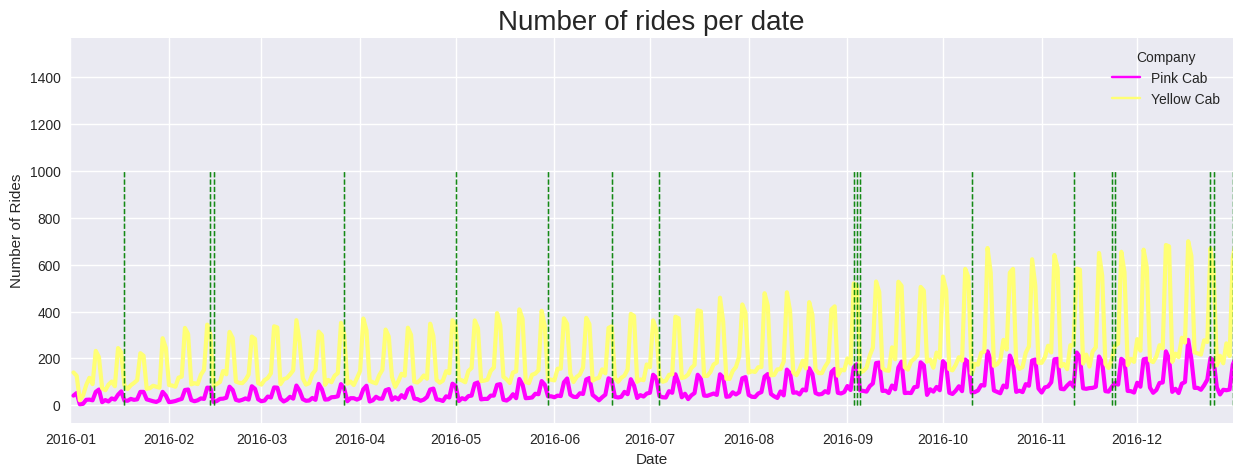

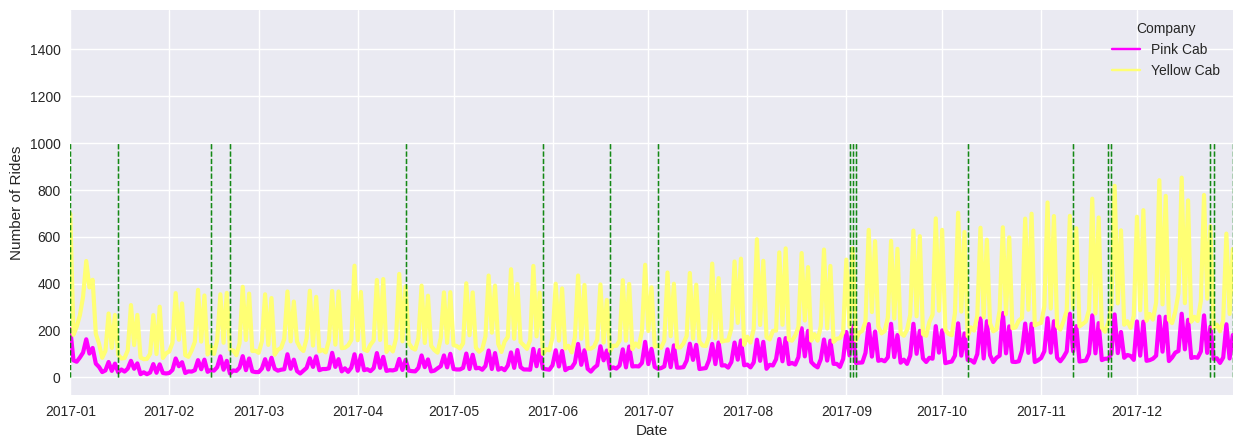

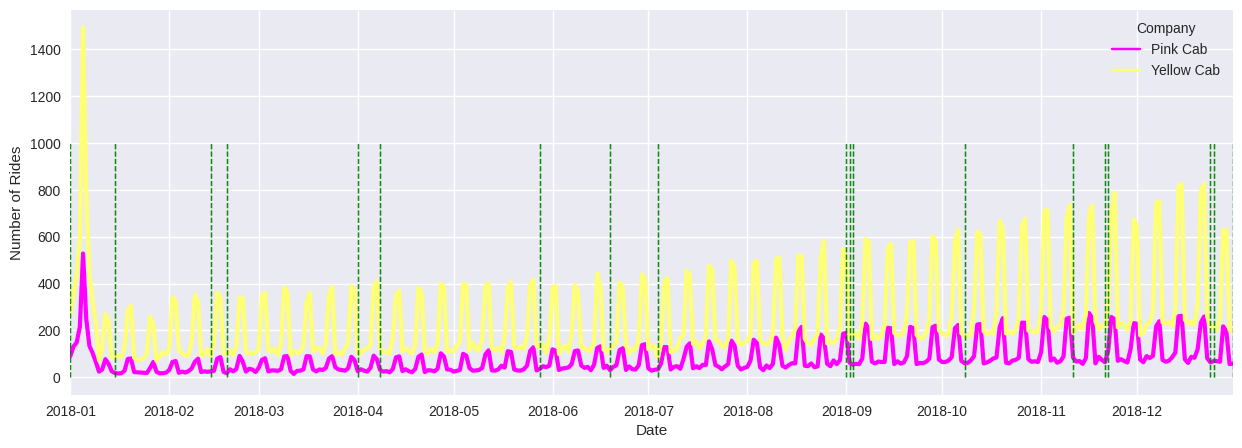

In [49]:

for i, year in enumerate(rides_per_date.Year.unique()):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    
    g = sns.lineplot(data=rides_per_date, x='Date', y='Number of Rides', hue='Company', 
                 palette=['#FF00FF', '#FFFF74'], linewidth=3, ax=ax)
    
    ax.vlines(x=rides_per_date['Date'], 
              ymin=0, ymax=rides_per_date['Holiday']*1000, 
              color='green', alpha=0.7, linewidth=1, linestyles='dashed')
       
    
    min_date = datetime.strptime(str(year)+'-01-01', '%Y-%m-%d')
    max_date = datetime.strptime(str(year)+'-12-31', '%Y-%m-%d')

    plt.xlim(min_date, max_date)
    if i == 0:
        plt.title('Number of rides per date', fontsize=20)

    plt.show()

- There is some year-trend in the data as well as seasonal component


- No obvious correlation between `Amount of rides` and `Holidays`, except for the significant rise in the number of rides after New Year in `2017` and `2018`

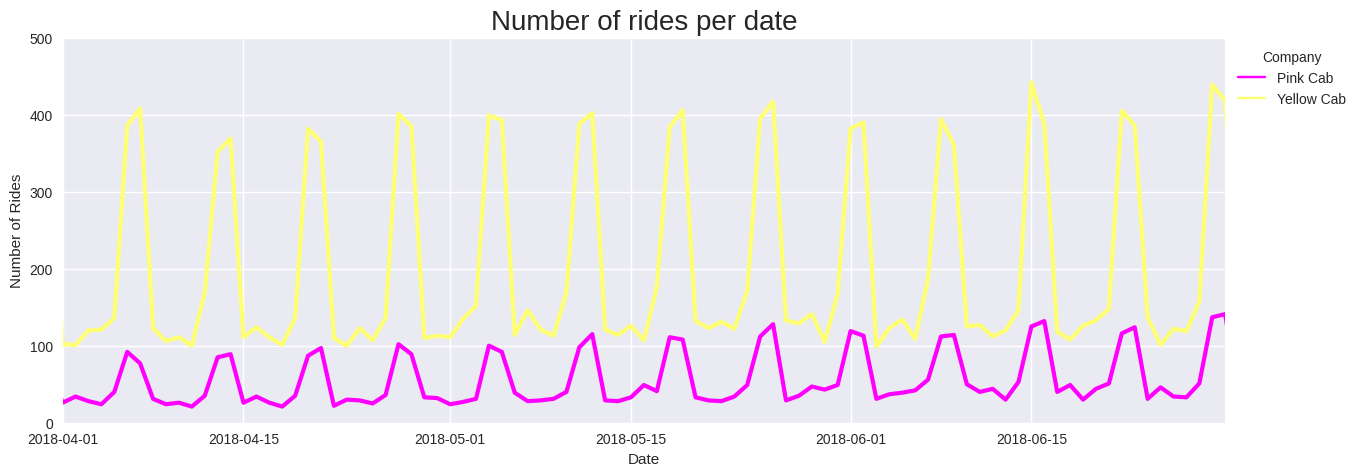

In [50]:
fig, ax = plt.subplots(1,1, figsize=(15,5))

min_date = datetime.strptime(str(year)+'-04-01', '%Y-%m-%d')
max_date = datetime.strptime(str(year)+'-06-30', '%Y-%m-%d')

g = sns.lineplot(data=rides_per_date, 
                 x='Date', y='Number of Rides', hue='Company', 
                 palette=['#FF00FF', '#FFFF74'], linewidth=3, ax=ax)

year = 2018
plt.ylim(0, 500)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Number of rides per date', fontsize=20)

plt.xlim(min_date, max_date)
plt.show()

- Seasonal component seems to have period of week

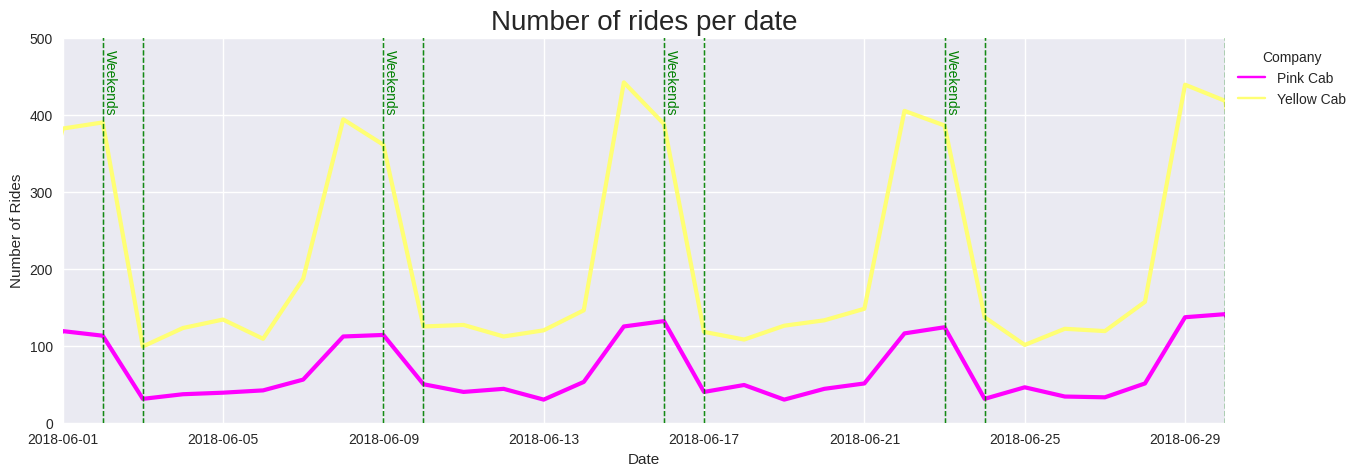

In [51]:
rides_per_date['WeekDay'] = rides_per_date['Date'].dt.dayofweek

rides_per_date['Weekend'] = rides_per_date['WeekDay'].apply(is_weekend)


fig, ax = plt.subplots(1,1, figsize=(15,5))


year = 2018

min_date = datetime.strptime(str(year)+'-06-01', '%Y-%m-%d')
max_date = datetime.strptime(str(year)+'-06-30', '%Y-%m-%d')

g = sns.lineplot(data=rides_per_date,
                 x='Date', y='Number of Rides', hue='Company', 
                 palette=['#FF00FF', '#FFFF74'], linewidth=3, ax=ax)

ax.vlines(x=rides_per_date['Date'], 
          ymin=0, ymax=rides_per_date['Weekend']*1000, 
          color='green', alpha=0.7, linewidth=1, linestyles='dashed')
    
plt.ylim(0, 500)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.text(datetime.strptime(str(year)+'-06-02', '%Y-%m-%d'), 400, 'Weekends', 
        color='green', va ='bottom', rotation=-90)
ax.text(datetime.strptime(str(year)+'-06-09', '%Y-%m-%d'), 400, 'Weekends', 
        color='green', va ='bottom', rotation=-90)
ax.text(datetime.strptime(str(year)+'-06-16', '%Y-%m-%d'), 400, 'Weekends', 
        color='green', va ='bottom', rotation=-90)
ax.text(datetime.strptime(str(year)+'-06-23', '%Y-%m-%d'), 400, 'Weekends', 
        color='green', va ='bottom', rotation=-90)

plt.title('Number of rides per date', fontsize=20)

plt.xlim(min_date, max_date)
plt.show()

- There is a high amount of orders in couple of days before the weekends, at the start of the week number of orders is the lowest

<div class="alert alert-block alert-info" style="background-color:#FEF9E7;color:black;border-color:black;width:90%;margin: auto;text-align: left;">
<b>Conclusion:</b> 
<br>
<br>1. Number of orders tends to go higher by the end of the year
<br> 2. In some years there are extremely high amount of orders during New Years holidays
<br>3. There is week-wise seasonal component: there is a high amount of orders in couple of days before the weekends, at the start of the week number of orders is the lowest
</div>

### Coverage Analysis

In [52]:
cutomers_per_city = df_total.groupby(['City', 'Company']).agg({'Customer ID':'nunique', 'Users':'mean'}).reset_index()
cutomers_per_city['Percent of users'] = cutomers_per_city['Customer ID']/cutomers_per_city['Users']*100

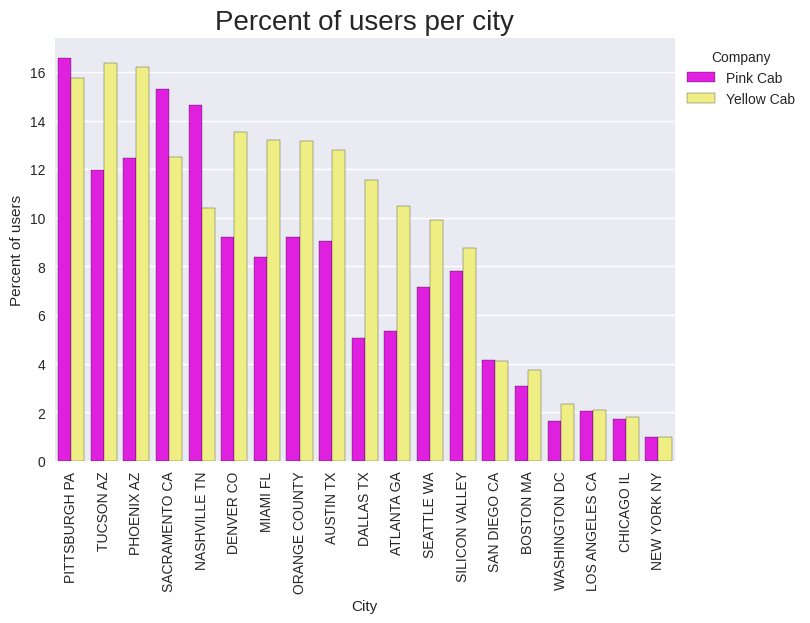

In [53]:
ax = sns.barplot(data=cutomers_per_city.sort_values(by='Percent of users', ascending=False), 
            x='City', y='Percent of users', 
            hue='Company', palette=['#FF00FF', '#FFFF74'], linewidth = 0.2, edgecolor = "black")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.title('Percent of users per city', fontsize=20)
plt.xticks(rotation=90)
plt.show()


- In most cities `Yellow` company have higher percentage of users

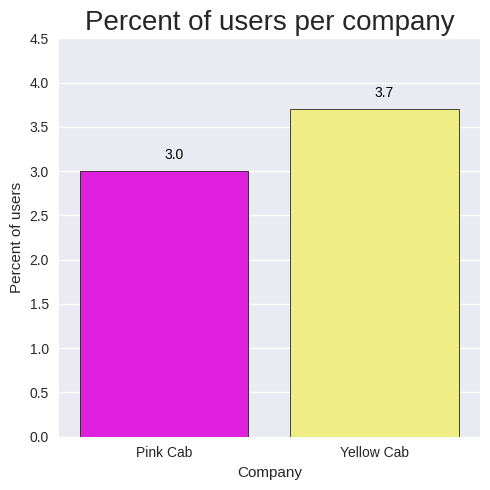

In [54]:
cutomers_total = cutomers_per_city.groupby('Company')['Customer ID', 'Users'].sum().reset_index()
cutomers_total['Percent of users'] = cutomers_total['Customer ID']/cutomers_total['Users']*100

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax = sns.barplot(data=cutomers_total, 
            x='Company', y='Percent of users', 
            palette=['#FF00FF', '#FFFF74'],linewidth = 0.5, edgecolor = "black")

for i, v in enumerate(cutomers_total["Percent of users"].iteritems()):        
    value = round(v[1], 1)
    ax.text(i, value+0.1, value, color='black', va ='bottom')
plt.ylim(0, 4.5)
plt.title('Percent of users per company', fontsize=20)
plt.tight_layout()

- In total `Yellow` company have higher percentage of users

In [55]:
users_per_year = df_total.groupby(['Company', 'Year']).agg({'Customer ID':'nunique'}).reset_index()

users_per_year['Shift'] = users_per_year['Customer ID'].shift(1, axis=0)

users_per_year['Percent Change'] = (users_per_year['Customer ID'] - users_per_year['Shift'])/users_per_year['Customer ID']*100
users_per_year = users_per_year.rename(columns={'Customer ID':'Amount of users'})

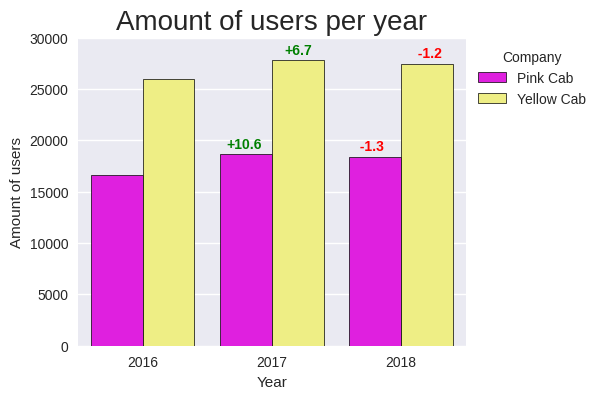

In [56]:
fig, ax = plt.subplots(1,1,figsize=(5,4))

ax = sns.barplot(data=users_per_year, 
            x='Year', y='Amount of users', hue='Company', 
            palette=['#FF00FF', '#FFFF74'], linewidth = 0.5, edgecolor = "black")

for i, (amount, percent) in enumerate(users_per_year[['Amount of users', "Percent Change"]].values):        
    
    if i != 0 and i!=3:
        if i > 3:
            i = i-3+0.45
        if percent > 0:
            t = '+{:.1f}'.format(percent)
            c = 'green'
        else:
            t = ' {:.1f}'.format(percent)
            c = 'red'
        ax.text(i-0.35, amount+300, t, color=c, va ='bottom', weight='bold')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0, 30000)
plt.title('Amount of users per year', fontsize=20)

plt.show()

- Both companies experienced growth in amount of users in `2016` and reduction by 1.2-1.3% in `2018` 

<div class="alert alert-block alert-info" style="background-color:#FEF9E7;color:black;border-color:black;width:90%;margin: auto;text-align: left;">
<b>Conclusion:</b> 
<br>
<br>1. In most cities Yellow company have higher percentage of users
<br> 2. In total `Yellow` company have higher percentage of users
<br>3. Both companies experienced growth in amount of users by +6.7% - for Yellow and +10.6% for Pink  in 2016 and reduction by 1.2-1.3% in 2018 
</div>

### Retention Analysis

In [57]:
rides_per_user = df_total.groupby(['Company', 'Customer ID']).agg({'Transaction ID':'nunique'}).reset_index()

rides_per_user = rides_per_user.rename(columns={'Transaction ID':'Number of Rides per User'})

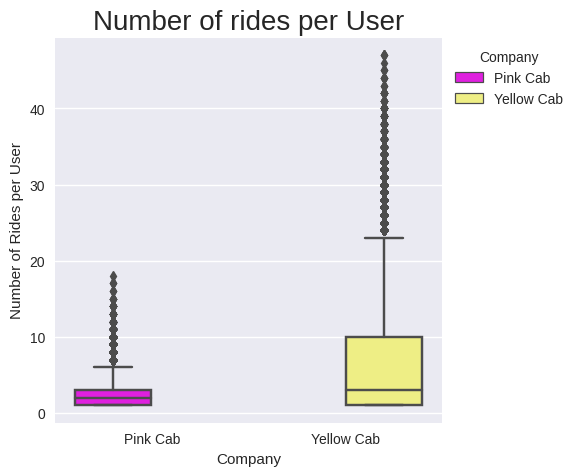

In [58]:
fig, ax = plt.subplots(1,1,figsize=(5, 5))

ax = sns.boxplot(data=rides_per_user, x='Company', y='Number of Rides per User', 
             hue='Company', palette=['#FF00FF', '#FFFF74'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Number of rides per User', fontsize=20)

plt.show()

- In general users in `Yellow` company have more rides per user

In [59]:
user_rides = df_total.groupby(['Customer ID', 'Year', 'Company']).agg({'Transaction ID':'nunique'})
user_rides = user_rides.rename(columns={'Transaction ID':'Number of Rides'})

user_rides = user_rides.unstack(level=2)
user_rides = user_rides.fillna(0)
user_rides['Total'] = user_rides[('Number of Rides',   'Pink Cab')]+user_rides[('Number of Rides',   'Yellow Cab')]

user_rides[('Rides percent', 'Pink Cab')] = user_rides[('Number of Rides',   'Pink Cab')]/user_rides['Total']*100
user_rides[('Rides percent', 'Yellow Cab')] = user_rides[('Number of Rides',   'Yellow Cab')]/user_rides['Total']*100
user_rides = user_rides.drop(columns=['Total'])
user_rides = user_rides.stack(level=1)

user_rides = user_rides.reset_index()

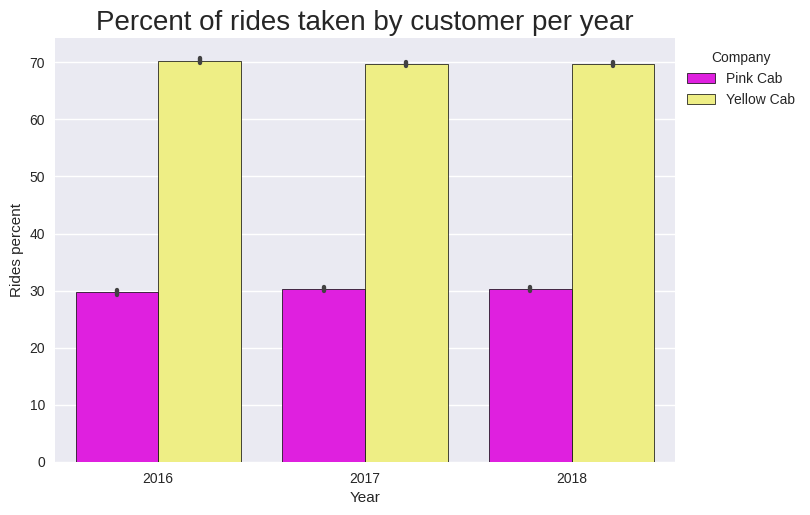

In [60]:
ax = sns.barplot(data=user_rides,
            x='Year', y='Rides percent', hue='Company', 
            linewidth = 0.5, edgecolor="black", palette=['#FF00FF', '#FFFF74'])

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Percent of rides taken by customer per year', fontsize=20)
plt.show()

- From year to year Users tends to select `Yellow` company in ~70% of their rides

<div class="alert alert-block alert-info" style="background-color:#FEF9E7;color:black;border-color:black;width:90%;margin: auto;text-align: left;">
<b>Conclusion:</b> 
<br>
<br>1. In general users in Yellow company have more rides per user
<br> 2. In 70% of cases users tends to select Yellow over Pink 
</div>

## Conclusion

According to performed analysis the conclusions are:

**1. Profit:**  

    - Profit of Yellow company is ~8 times bigger than profit of Pink company
    - Average profit per km of Yellow company is ~2.5 times bigger than of Pink company
    - Most of the profit of Yellow and Pink companies comes from New York
    - Yellow cab company's rides are 95% profitable, in contrast 87% of Pink company's  rides are profitable


**2. Customer profile:**

    - 73% of customers are below age 40 and 27% are older for both companies
    - Percentage of Males is ~8% higher than Females for both companies
    - 91% of customers have income < 25000 usd and 9% have more


**3. Coverage:**

    - In most cities Yellow company have higher percentage of users
    - In total `Yellow` company have higher percentage of users
   
   
**4. Seasonal dependency:**

    - Number of orders tends to go higher by the end of the year
    - In some years there are extremely high amount of orders during New Years holidays
    - Theres is week-wise seasonal component: there is a high amount of orders in couple of days before the weekends, at the start of the week number of orders is the lowest
  
  
**5. Retention:**
    
    - In general users in Yellow company have more rides per user
    - In 70% of cases users tends to select Yellow over Pink



**Recomendation**:
    On basis of point above we recommend Yellow cab for investment 